# Convolution filter

#### this notebook is yet another attempt to write and test a convolutional filter using convolutional theorem. see exploring filters 2 for sourses and the last attempt

first lets build a noisey but controled sample

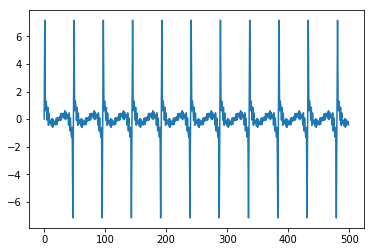

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cmath

class waveGen:
	
	def __init__(self, freq, BufferSize, waveType, vol):
		
		self.sampleRate = 48000
		self.bufferSize = BufferSize
		self.buffer = np.empty(BufferSize, dtype=np.complex)
		self.frequency = freq
		self.omega = 0
		self.updateOmega()
		self.last = complex(1,0)
		self.type = waveType
		self.volume = vol

	def sineGen(self):
		for i in range(0, self.bufferSize):
			self.buffer[i] = self.last
			self.last=self.last*self.omega
		return self.volume * np.imag(self.buffer).astype(np.float32)

	def updateOmega(self):
		self.omega = cmath.exp(1j*(2*cmath.pi * self.frequency / self.sampleRate))

	def updateFreq(self, val):
		self.frequency = val
		self.updateOmega()

	def nextFrame(self):
		if self.type == "sine":
			return self.sineGen()
		elif self.type == "square":
			return self.squareGen()
		elif self.type == "triangle":
			return self.triangleGen()

#fft needs a power of 2
windowSize = 48000
        
test_sample = np.zeros(windowSize)

#how many hz between added samples
gap = 1000
maxFreq = 20000
minFreq = 2000

currFreq = minFreq

while currFreq <= maxFreq:
    osc = waveGen(currFreq, windowSize, 'sine', .5)
    test_sample += osc.nextFrame()
    currFreq += gap

#show plots of time domain
plt.plot(test_sample[:500])
plt.show()

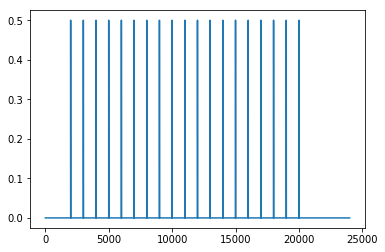

In [24]:
#And plot time domain

test_FreqSpec = np.fft.fft(test_sample)

#linespaceing
T = 1.0 / 48000.0

#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), windowSize//2)

#ploting the graph
plt.plot(xf, 2.0/windowSize * np.abs(test_FreqSpec[:windowSize//2]))
plt.show()

### I will try first with a hanning window

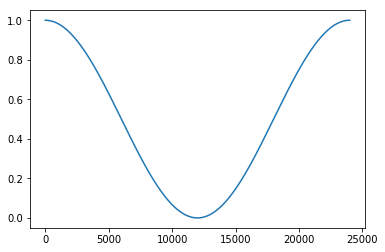

In [25]:
hanning = np.hanning(windowSize // 2)


low_pass_window = np.append(hanning[len(hanning) // 2:], hanning[:len(hanning) //2])


TD_window = np.fft.ifft(low_pass_window)


plt.plot(low_pass_window)
plt.show()

In [26]:

def convolve(signal, window):
    
    #if len(signal) != len(window):
    #    print ('arrays must be of equal size')
    #    return None
    
    x = signal
    h = np.fft.ifft(window)
    y = np.convolve(h, x) 
        
    return y
        
def convolve_freq(signal, window):
    
    if len(signal) != len(window):
        print ('arrays must be of equal size')
        return None

    X = np.fft.fft(signal)
    H = window
    Y = X * H
    
    return np.fft.ifft(Y)

/usr/lib64/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


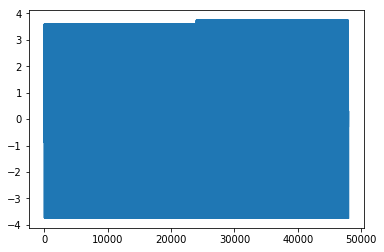

In [27]:
filtered_signal = convolve(test_sample, low_pass_window)
plt.plot(filtered_signal[:windowSize])
plt.show()

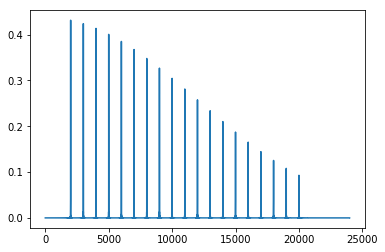

In [28]:
#And plot time domain

filtered_FreqSpec = np.fft.fft(filtered_signal[:windowSize])

#linespaceing
T = 1.0 / 48000.0

#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), windowSize//2)

#ploting the graph
plt.plot(xf, 2.0/windowSize * np.abs(filtered_FreqSpec[:windowSize//2]))
plt.show()